## Importing the Libraries and Reading through the Datasets

In [4]:
# Importing all the rquired Libraries

import pandas as pd
import numpy as np
import nltk
import re
import string
from rake_nltk import Rake
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [5]:
# Reading the datasets into pandas Dataframe
df_movies = pd.read_csv("IMDb movies.csv")
df_ratings = pd.read_csv("IMDb ratings.csv")

In [6]:
# Taking a look at the Movie Details Dataframe
df_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


In [7]:
# Taking a look at the Movie Rating Statistics Dataframe
df_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,6.1,537,6.3,6.0,54,17,55,121,122,...,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,tt0001892,5.9,171,6.1,6.0,5,6,17,41,52,...,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0
2,tt0002101,5.2,420,5.2,5.0,12,8,16,60,89,...,5.5,14.0,6.2,20.0,4.9,57.0,5.5,197.0,4.7,103.0
3,tt0002130,7.0,2019,6.9,7.0,194,208,386,571,308,...,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
4,tt0002199,5.7,438,5.8,6.0,28,15,42,75,114,...,4.8,10.0,6.5,15.0,5.7,56.0,5.9,161.0,5.7,164.0


## Data Cleaning

In [8]:
# Removing all the unwanted columns from the two Dataframes
df_movies = df_movies[['imdb_title_id','title', 'duration', 'year', 'genre', 'language', 'actors', 'director','description']]
df_ratings = df_ratings[['imdb_title_id', 'mean_vote', 'weighted_average_vote','median_vote', 'total_votes']]

In [9]:
# Taking a look at all the columns in the dataframe(s) after dropping unwanted columns
print("Columns for Movie Details: \n",df_movies.columns)
print("Columns for Movie Rating statistics: \n", df_ratings.columns)

Columns for Movie Details: 
 Index(['imdb_title_id', 'title', 'duration', 'year', 'genre', 'language',
       'actors', 'director', 'description'],
      dtype='object')
Columns for Movie Rating statistics: 
 Index(['imdb_title_id', 'mean_vote', 'weighted_average_vote', 'median_vote',
       'total_votes'],
      dtype='object')


In [10]:
# Merging the two dataframes
df = pd.merge(df_movies, df_ratings, on='imdb_title_id')

In [11]:
# Dropping all the columns with Nan Values
print("Shape, Before dropping Nan Values: ",df.shape)
df.dropna(inplace = True)
print("Shape, After dropping Nan Values: ",df.shape)

Shape, Before dropping Nan Values:  (81273, 13)
Shape, After dropping Nan Values:  (78011, 13)


In [12]:
# Removing all those movies which have a rating of less than 5 and if the number of reviewers are less than 500
df = df[(df['mean_vote'] >= 5) & (df['total_votes'] >= 500)]
print("Shape of the dataframe after dropping selected movies: ",df.shape)

Shape of the dataframe after dropping selected movies:  (36075, 13)


In [13]:
# Dropping the Index
df.reset_index(drop=True,inplace=True)

In [14]:
# Converting all the strings to lower case to avoid ambiguity
df = df.apply(lambda x: x.astype(str).str.lower())

In [15]:
df

,imdb_title_id,title,duration,year,genre,language,actors,director,description,mean_vote,weighted_average_vote,median_vote,total_votes
0,tt0002130,l'inferno,68,1911,"adventure, drama, fantasy",italian,"salvatore papa, arturo pirovano, giuseppe de l...","francesco bertolini, adolfo padovan",loosely adapted from dante's divine comedy and...,6.9,7.0,7.0,2019
1,tt0002423,madame dubarry,85,1919,"biography, drama, romance",german,"pola negri, emil jannings, harry liedtke, edua...",ernst lubitsch,"the story of madame dubarry, the mistress of l...",6.8,6.8,7.0,709
2,tt0002844,fantômas - à l'ombre de la guillotine,54,1913,"crime, drama",french,"rené navarre, edmund breon, georges melchior, ...",louis feuillade,inspector juve is tasked to investigate and ca...,6.6,7.0,7.0,1853
3,tt0003037,juve contre fantômas,61,1913,"crime, drama",french,"rené navarre, edmund breon, georges melchior, ...",louis feuillade,in part two of louis feuillade's 5 1/2-hour ep...,6.5,7.0,7.0,1295
4,tt0003165,le mort qui tue,90,1913,"crime, drama, mystery",french,"rené navarre, edmund breon, georges melchior, ...",louis feuillade,after a body disappears from inside the prison...,6.6,7.0,7.0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36070,tt9860728,falling inn love,98,2019,"comedy, romance",english,"christina milian, adam demos, jeffrey bowyer-c...",roger kumble,when city girl gabriela spontaneously enters a...,5.7,5.6,6.0,9816
36071,tt9866700,paranormal investigation,92,2018,"horror, thriller",french,"jose atuncar, claudine bertin, cedric henquez,...",franck phelizon,when a young man becomes possessed after playi...,7.3,3.7,9.0,1145
36072,tt9900782,kaithi,145,2019,"action, thriller",tamil,"karthi, narain, dheena, george maryan, ramana,...",lokesh kanagaraj,"a drug bust, an injured cop and a convicted cr...",8.9,8.9,10.0,3082
36073,tt9905412,ottam,120,2019,drama,malayalam,"nandu anand, roshan ullas, manikandan r. achar...",zam,"set in trivandrum, the story of ottam unfolds ...",7.8,7.8,9.0,510


## Data Analysis

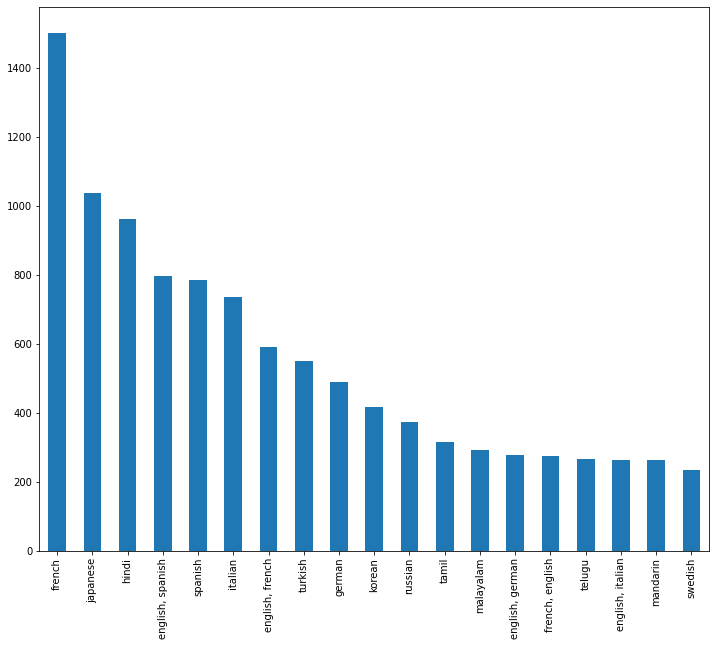

In [16]:
# Taking a look at the different movie languages
df['language'].value_counts()[1:20].plot(kind = 'bar', figsize = [12,10])

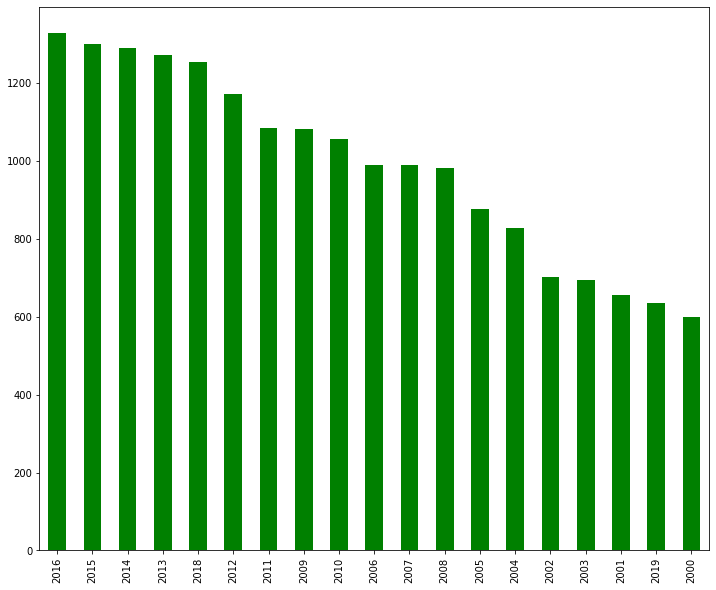

In [17]:
# Taking a look at the number of movies released in a year
df['year'].value_counts()[1:20].plot(kind = 'bar', figsize = [12,10], color='green')

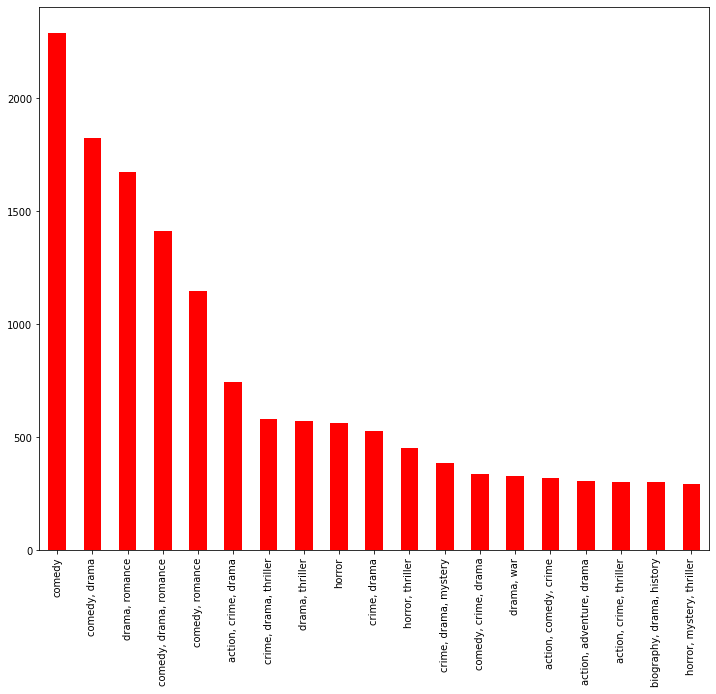

In [18]:
# Taking a look at the number of movies based on the different Genres
df['genre'].value_counts()[1:20].plot(kind = 'bar', figsize = [12,10], color='red')